Import libraries

In [6]:
from algorithm import *
from classes.environment import Environment

import h5py
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Used for seed in np.random
Reproduce = 2023

Baseline

In [2]:
k = 6
Qs = [1 + 0.5*i for i in range(7)]
env = Environment()

In [3]:
np.random.seed(Reproduce)
pi1, pi2, theta1, theta2, q1, q2 = simulate_episode(env, Qs, k)

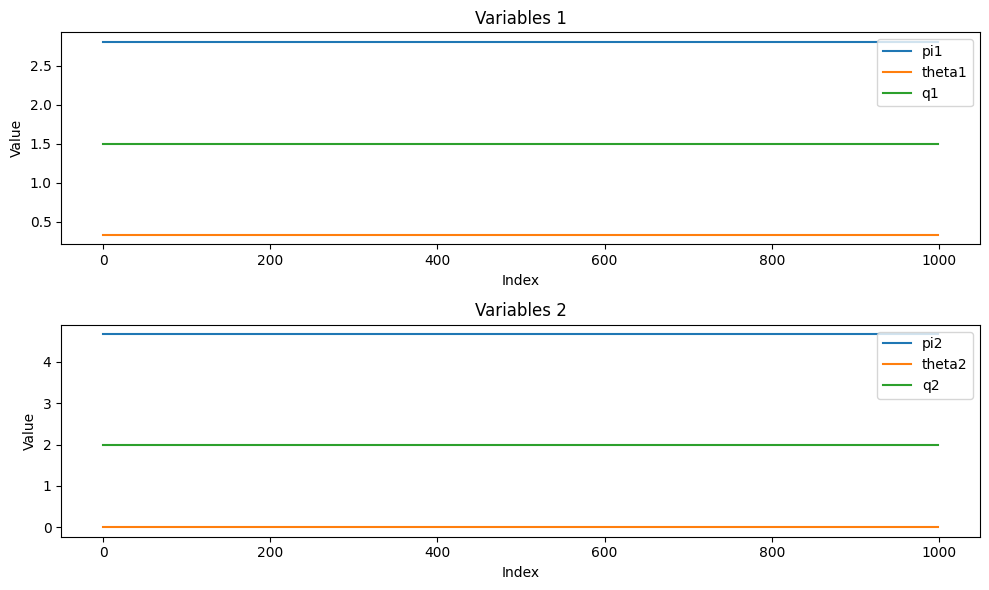

In [4]:
# Variables 1 plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(pi1, label='pi1')
plt.plot(theta1, label='theta1')
plt.plot(q1, label='q1')
plt.legend()
plt.title('Variables 1')
plt.xlabel('Index')
plt.ylabel('Value')

# Variables 2 plot
plt.subplot(2, 1, 2)
plt.plot(pi2, label='pi2')
plt.plot(theta2, label='theta2')
plt.plot(q2, label='q2')
plt.legend()
plt.title('Variables 2')
plt.xlabel('Index')
plt.ylabel('Value')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [5]:
print(pi1[0], pi2[0], theta1[0], theta2[0], q1[0], q2[0])

2.8055555555555554 4.666666666666667 0.3333333333333333 0.0 1.5 2.0


Save data in a HDF5 file

In [7]:
current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', 'data', 'simulation_data.h5')
file = h5py.File(file_path, 'w')

In [8]:
# Create a group for the data
group = file.create_group('simulation')

# Store the lists as datasets within the group
group.create_dataset('pi1', data=np.array(pi1))
group.create_dataset('pi2', data=np.array(pi2))
group.create_dataset('theta1', data=np.array(theta1))
group.create_dataset('theta2', data=np.array(theta2))
group.create_dataset('q1', data=np.array(q1))
group.create_dataset('q2', data=np.array(q2))

# Close the HDF5 file
file.close()

In [10]:
# Open the HDF5 file in read mode
file = h5py.File(file_path, 'r')

# Access the dataset within the 'simulation' group
dataset = file['simulation/q1']

# Read the data into a numpy array
q1_data = dataset[:]

# Close the HDF5 file
file.close()